# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.style.use('dark_background')

In [3]:
def format_dataframe(df:pd.DataFrame) -> pd.DataFrame:
    """Formats the numerical values in the dataframe with comma seperation"""
    formatted_df = df.map(lambda x: "{:,}".format(x) if isinstance(x, (int, float)) else x)
    return formatted_df

# All Tables in the sheet

In [4]:
sales_sheet = pd.read_excel("data\data.xlsx", sheet_name=None)

for table, df in sales_sheet.items():
    print(f"<------------------{table} ------------------>")
    print(display(df.head()), '\n\n')

<------------------2022 Sales ------------------>


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799


None 


<------------------2021 Sales ------------------>


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10008,PID2076,A157,EMP1015,C1121,2021-02-13,2,1522
1,OID10013,PID2087,A160,EMP1020,C1461,2021-01-28,1,1022
2,OID10015,PID2037,A103,EMP1010,C1510,2021-03-14,2,880
3,OID10016,PID2097,A130,EMP1023,C1133,2021-07-26,1,1052
4,OID10018,PID2005,A158,EMP1037,C1240,2021-03-28,1,684


None 


<------------------2020 Sales ------------------>


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10001,PID2071,A152,EMP1009,C1499,2020-09-23,1,136
1,OID10002,PID2053,A139,EMP1007,C1359,2020-02-07,1,596
2,OID10005,PID2030,A121,EMP1003,C1220,2020-06-27,1,1899
3,OID10007,PID2001,A122,EMP1003,C1368,2020-01-12,4,951
4,OID10009,PID2082,A101,EMP1029,C1764,2020-07-28,1,1103


None 


<------------------Products ------------------>


,Product ID,Product Name,Cost,Original Sale Price,Discount,Current Price,Taxes
0,PID2000,Product 1,1367,2241,0,2241,336.15
1,PID2001,Product 2,504,951,0,951,142.65
2,PID2002,Product 3,534,847,0,847,127.05
3,PID2003,Product 4,1516,1783,0,1783,267.45
4,PID2004,Product 5,665,1278,0,1278,191.70


None 


<------------------Locations ------------------>


,Location ID,Name,County,State Code,State,Type,Latitude,Longitude,Area Code,Population,Households,Median Income,Land Area,Water Area,Time Zone
0,A100,Anaheim,Orange County,CA,California,City,33.83529,-117.91450,657,350742,99670,60752,129438076,2457142,America/Los Angeles
1,A101,Antioch,Contra Costa County,CA,California,City,38.00492,-121.80579,925,110542,33718,64329,76173197,1842711,America/Los Angeles
2,A102,Bakersfield,Kern County,CA,California,City,35.37329,-119.01871,661,373640,112439,57095,385366784,3809676,America/Los Angeles
3,A103,Berkeley,Alameda County,CA,California,City,37.87159,-122.27275,510,120972,45917,66237,27106077,18715614,America/Los Angeles
4,A104,Burbank,Los Angeles County,CA,California,City,34.18084,-118.30897,818,105319,41361,66076,44947219,94286,America/Los Angeles


None 


<------------------Customers ------------------>


,Customer ID,Customer Name
0,C1000,Thomas Duncan
1,C1001,Kenneth Ross
2,C1002,Henry Reyes
3,C1003,Benjamin Carter
4,C1004,Jeremy Schmidt


None 


<------------------Sales People ------------------>


,Salesperson ID,Salesperson Name
0,EMP1000,Fred Robertson
1,EMP1001,Kevin Butler
2,EMP1002,Andrew Bowman
3,EMP1003,Christopher Tucker
4,EMP1004,Kenneth Bradley


None 


<------------------Budgeting ------------------>


,Location ID,Name,Revenue,Unnamed: 3,Unnamed: 4,Month,Month Number,Monthly Allocation2
0,A189,Alexandria,46400,NaN,NaN,Jan,1.0,0.04
1,A165,Amherst,53400,NaN,NaN,Feb,2.0,0.07
2,A190,Arlington,45800,NaN,NaN,Mar,3.0,0.07
3,A135,Athens,40200,NaN,NaN,Apr,4.0,0.10
4,A136,Atlanta,41700,NaN,NaN,May,5.0,0.13


None 


<------------------Date Ranges ------------------>


,Time Frame,Days,Index
0,7d,7,1
1,14d,14,2
2,30d,30,3
3,90d,90,4
4,180d,180,5


None 




# concatinate all sales table

In [5]:
import re
from collections import defaultdict



all_sales_tables = defaultdict(pd.DataFrame)


for table_name, df in sales_sheet.items():
    if re.search(r'\d+', table_name) and re.search(r'\bsales\b', table_name, re.IGNORECASE):
        print("YES!!", table_name, "\n")
        all_sales_tables[table_name] = df

YES!! 2022 Sales 

YES!! 2021 Sales 

YES!! 2020 Sales 



In [6]:
for table, df in all_sales_tables.items():
    print(f'---------{table}---------')
    print(display(df.head()), "\n")
    print(df.shape, "\n")

---------2022 Sales---------


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799


None 

(1197, 8) 

---------2021 Sales---------


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10008,PID2076,A157,EMP1015,C1121,2021-02-13,2,1522
1,OID10013,PID2087,A160,EMP1020,C1461,2021-01-28,1,1022
2,OID10015,PID2037,A103,EMP1010,C1510,2021-03-14,2,880
3,OID10016,PID2097,A130,EMP1023,C1133,2021-07-26,1,1052
4,OID10018,PID2005,A158,EMP1037,C1240,2021-03-28,1,684


None 

(4909, 8) 

---------2020 Sales---------


,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price
0,OID10001,PID2071,A152,EMP1009,C1499,2020-09-23,1,136
1,OID10002,PID2053,A139,EMP1007,C1359,2020-02-07,1,596
2,OID10005,PID2030,A121,EMP1003,C1220,2020-06-27,1,1899
3,OID10007,PID2001,A122,EMP1003,C1368,2020-01-12,4,951
4,OID10009,PID2082,A101,EMP1029,C1764,2020-07-28,1,1103


None 

(4980, 8) 



In [7]:
concat_sales_table = pd.concat(all_sales_tables.values(), ignore_index=True)

In [8]:
concat_sales_table["Total Sales"] = concat_sales_table['Quantity'] * concat_sales_table['Price']
concat_sales_table

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799
...,...,...,...,...,...,...,...,...,...
11081,OID24983,PID2024,A156,EMP1031,C1783,2020-01-16,4,356,1424
11082,OID22887,PID2074,A171,EMP1033,C1468,2020-03-31,4,504,2016
11083,OID24988,PID2079,A142,EMP1010,C1305,2020-04-19,1,1725,1725
11084,OID24996,PID2006,A113,EMP1032,C1765,2020-08-19,1,1826,1826


# KPI's

## Top-selling products

In [9]:
concat_sales_table.head()

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799


In [10]:
products_table = sales_sheet['Products']
products_table.head()

,Product ID,Product Name,Cost,Original Sale Price,Discount,Current Price,Taxes
0,PID2000,Product 1,1367,2241,0,2241,336.15
1,PID2001,Product 2,504,951,0,951,142.65
2,PID2002,Product 3,534,847,0,847,127.05
3,PID2003,Product 4,1516,1783,0,1783,267.45
4,PID2004,Product 5,665,1278,0,1278,191.70


In [11]:
sales_and_products = concat_sales_table.merge(products_table, on='Product ID', how='left')
sales_and_products.head()

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales,Product Name,Cost,Original Sale Price,Discount,Current Price,Taxes
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392,Product 30,1294,1848,0,1848,277.20
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725,Product 80,1363,1725,0,1725,258.75
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913,Product 62,584,913,0,913,136.95
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141,Product 84,1777,2141,0,2141,321.15
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799,Product 101,455,799,0,799,119.85


In [12]:
df = sales_and_products[['Product Name', 'Total Sales']]
df

,Product Name,Total Sales
0,Product 30,7392
1,Product 80,1725
2,Product 62,913
3,Product 84,2141
4,Product 101,799
...,...,...
11081,Product 25,1424
11082,Product 75,2016
11083,Product 80,1725
11084,Product 7,1826


In [13]:
rank = 10

top_n_products = df.groupby('Product Name').agg('sum').sort_values(by='Total Sales',ascending=False)[:rank]
format_dataframe(top_n_products)

,Total Sales
Product Name,
Product 63,"645,568"
Product 28,"616,759"
Product 47,"559,120"
Product 59,"548,451"
Product 29,"541,071"
Product 84,"537,391"
Product 56,"499,000"
Product 66,"486,388"
Product 33,"477,981"


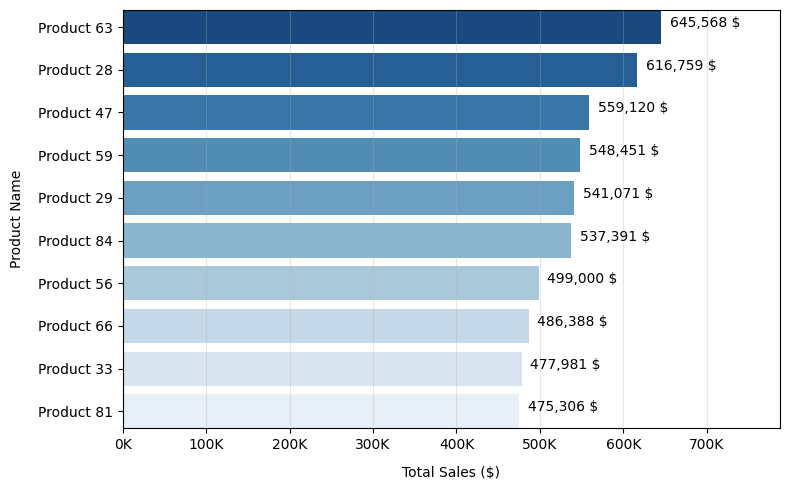

In [14]:
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(8, 5), dpi=140)

colors = sns.color_palette("Blues", n_colors=rank)[::-1]
ax = sns.barplot(data=top_n_products, x='Total Sales', y=top_n_products.index, hue=top_n_products.index, palette=colors, orient='h')
ax.margins(x=0.22, y=0)

for index, value in enumerate(top_n_products['Total Sales']):
    ax.text(value + 10000, index, f"{value:,} $", ha='left')


formatter = FuncFormatter(lambda x, _: f'{x//1000:.0f}K')
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Total Sales ($)", labelpad=10)
ax.set_ylabel("Product Name", labelpad=10)
plt.grid(True, axis="x", alpha=0.3)
# plt.title(f"Top {rank} Products", pad=10, fontweight="bold")
plt.tight_layout()

plt.show()

## Sales trends

Create `dates` table

In [15]:
date_min = concat_sales_table['Order Date'].min()
date_max = concat_sales_table['Order Date'].max()
date_min, date_max

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-03-31 00:00:00'))

In [16]:
calender_dates = pd.date_range(start=date_min, end=date_max, freq='D')
dates_table = pd.DataFrame(calender_dates, columns=['Order Date'])
dates_table

,Order Date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
816,2022-03-27
817,2022-03-28
818,2022-03-29
819,2022-03-30


In [17]:
dates_table["Year"] = dates_table["Order Date"].dt.year
dates_table["Qtr"] = dates_table["Order Date"].dt.quarter
dates_table["Month Name"] = dates_table["Order Date"].dt.month_name()

dates_table["Year Qtr"] = dates_table['Year'].astype(str) + " Qtr " + dates_table['Qtr'].astype(str)
dates_table["Year Monthname"] = dates_table['Order Date'].dt.strftime('%Y %B')
dates_table

,Order Date,Year,Qtr,Month Name,Year Qtr,Year Monthname
0,2020-01-01,2020,1,January,2020 Qtr 1,2020 January
1,2020-01-02,2020,1,January,2020 Qtr 1,2020 January
2,2020-01-03,2020,1,January,2020 Qtr 1,2020 January
3,2020-01-04,2020,1,January,2020 Qtr 1,2020 January
4,2020-01-05,2020,1,January,2020 Qtr 1,2020 January
...,...,...,...,...,...,...
816,2022-03-27,2022,1,March,2022 Qtr 1,2022 March
817,2022-03-28,2022,1,March,2022 Qtr 1,2022 March
818,2022-03-29,2022,1,March,2022 Qtr 1,2022 March
819,2022-03-30,2022,1,March,2022 Qtr 1,2022 March


In [18]:
concat_sales_table

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799
...,...,...,...,...,...,...,...,...,...
11081,OID24983,PID2024,A156,EMP1031,C1783,2020-01-16,4,356,1424
11082,OID22887,PID2074,A171,EMP1033,C1468,2020-03-31,4,504,2016
11083,OID24988,PID2079,A142,EMP1010,C1305,2020-04-19,1,1725,1725
11084,OID24996,PID2006,A113,EMP1032,C1765,2020-08-19,1,1826,1826


Merge all dates with all sales

In [19]:
sales_with_dates = dates_table.merge(concat_sales_table, on='Order Date', how='left', )[list(dates_table.columns) + ['Total Sales']]
sales_with_dates.fillna(0, inplace=True)
sales_with_dates

,Order Date,Year,Qtr,Month Name,Year Qtr,Year Monthname,Total Sales
0,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,880.0
1,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,1568.0
2,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,530.0
3,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,3774.0
4,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,1022.0
...,...,...,...,...,...,...,...
11082,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,530.0
11083,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,1119.0
11084,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,880.0
11085,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,203.0


In [20]:
# sales_with_dates["Year"] = sales_with_dates["Order Date"].dt.year
# sales_with_dates["Qtr"] = sales_with_dates["Order Date"].dt.quarter
# sales_with_dates["Month Name"] = sales_with_dates["Order Date"].dt.month_name()

# sales_with_dates["Year Qtr"] = sales_with_dates['Year'].astype(str) + " Qtr " + sales_with_dates['Qtr'].astype(str)
# sales_with_dates["Year Monthname"] = sales_with_dates['Order Date'].dt.strftime('%Y %B')
# sales_with_dates

### Yearly sales

In [21]:
yearly_sales = sales_with_dates.pivot_table(index='Year', values='Total Sales', aggfunc='sum')
yearly_sales.map(lambda x: f"{x:,}")

,Total Sales
Year,
2020,"11,690,763.0"
2021,"11,565,545.0"
2022,"2,864,209.0"


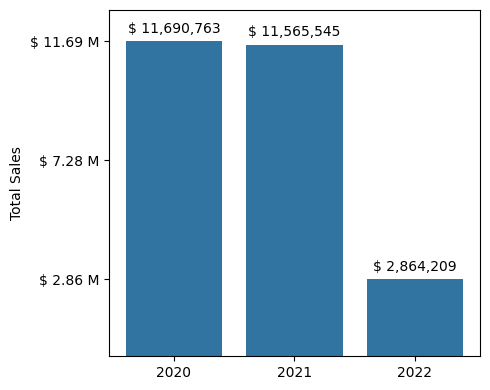

In [22]:
y_axis_split = 3

y_tickers = np.linspace(yearly_sales['Total Sales'].min(), yearly_sales['Total Sales'].max(), y_axis_split)
y_tick_labels = [f"$ {x/10**6:.2f} M" for x in (y_tickers)]


plt.figure(figsize=(5, 4), dpi=130)

ax = sns.barplot(x=yearly_sales.index, y=yearly_sales["Total Sales"])
plt.yticks(y_tickers, labels=y_tick_labels)
plt.xlabel("")
ax.margins(x=0.05, y=0.1)

for p in ax.patches:
    ax.annotate(
        f"$ {p.get_height():,.0f}",
        xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
# plt.title("Yearly Sales", pad=10, fontweight="bold")
plt.tight_layout()

plt.show()

### Qtrly Sales

In [23]:
qtrly_sales_query = sales_with_dates.pivot_table(index=['Year', 'Qtr'], values='Total Sales', aggfunc='sum')
qtrly_sales_query

Total Sales
Year Qtr             
2020 1      2931179.0
     2      3015541.0
     3      2809398.0
     4      2934645.0
2021 1      2841656.0
     2      2867766.0
     3      2785866.0
     4      3070257.0
2022 1      2864209.0

In [24]:
qtrly_sales = sales_with_dates.pivot_table(index=['Year Qtr'], values='Total Sales', aggfunc='sum')
qtrly_sales

,Total Sales
Year Qtr,
2020 Qtr 1,2931179.0
2020 Qtr 2,3015541.0
2020 Qtr 3,2809398.0
2020 Qtr 4,2934645.0
2021 Qtr 1,2841656.0
2021 Qtr 2,2867766.0
2021 Qtr 3,2785866.0
2021 Qtr 4,3070257.0
2022 Qtr 1,2864209.0


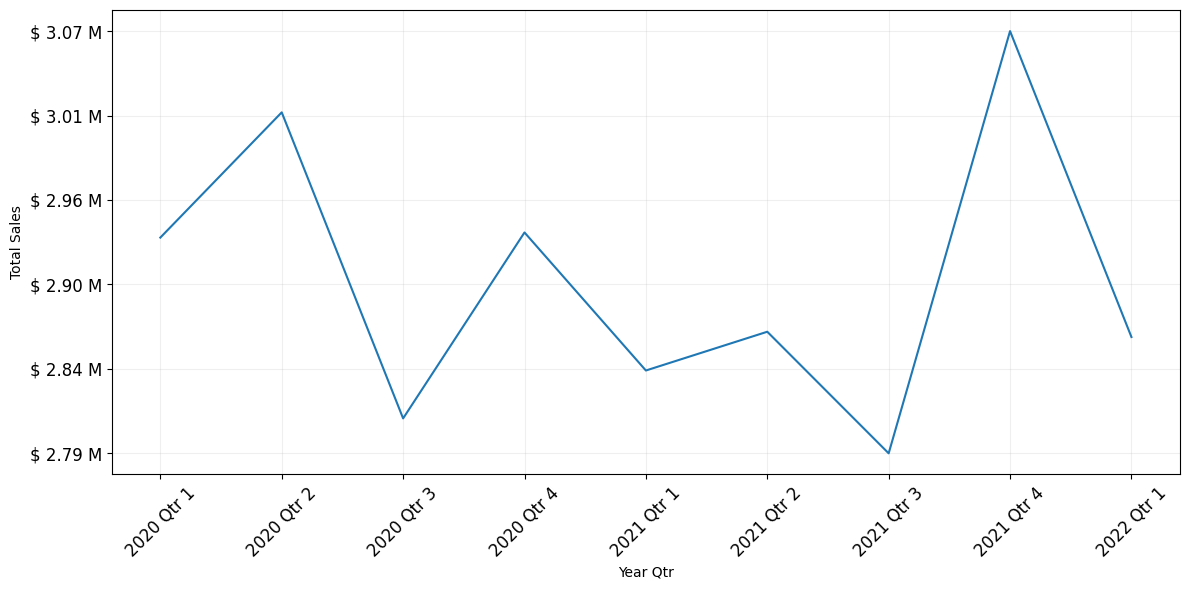

In [25]:
y_axis_split = 6
y_tickers = np.linspace(qtrly_sales['Total Sales'].min(), qtrly_sales['Total Sales'].max() + 1, y_axis_split)
y_tickers_labels = [f"$ {x/10**6:.2f} M" for x in y_tickers]


plt.figure(figsize=(12, 6))

sns.lineplot(x=qtrly_sales.index, y=qtrly_sales['Total Sales'])
plt.xticks(rotation=45, font={"size": 12})
plt.yticks(y_tickers, labels=y_tickers_labels, font={"size": 12})
plt.grid(True, alpha=0.2)
# plt.title("Sales Trend (Quarterly)", pad=10, fontweight="bold")
plt.tight_layout()

plt.show()

### Monthly Sales

In [26]:
monthly_sales_query = sales_with_dates.pivot_table(index=['Year', 'Month Name'], values='Total Sales', aggfunc='sum')
monthly_sales_query

Total Sales
Year Month Name             
2020 April          954294.0
     August         922649.0
     December       998531.0
     February       989964.0
     January       1024700.0
     July           893324.0
     June          1049952.0
     March          916515.0
     May           1011295.0
     November      1019213.0
     October        916901.0
     September      993425.0
2021 April          984774.0
     August         887709.0
     December      1053431.0
     February       913174.0
     January        944532.0
     July           938285.0
     June          1017053.0
     March          983950.0
     May            865939.0
     November      1035024.0
     October        981802.0
     September      959872.0
2022 February       976706.0
     January        899923.0
     March          987580.0

In [27]:
monthly_sales = sales_with_dates.pivot_table(index=['Year Monthname'], values='Total Sales', aggfunc='sum')
monthly_sales

,Total Sales
Year Monthname,
2020 April,954294.0
2020 August,922649.0
2020 December,998531.0
2020 February,989964.0
2020 January,1024700.0
2020 July,893324.0
2020 June,1049952.0
2020 March,916515.0
2020 May,1011295.0


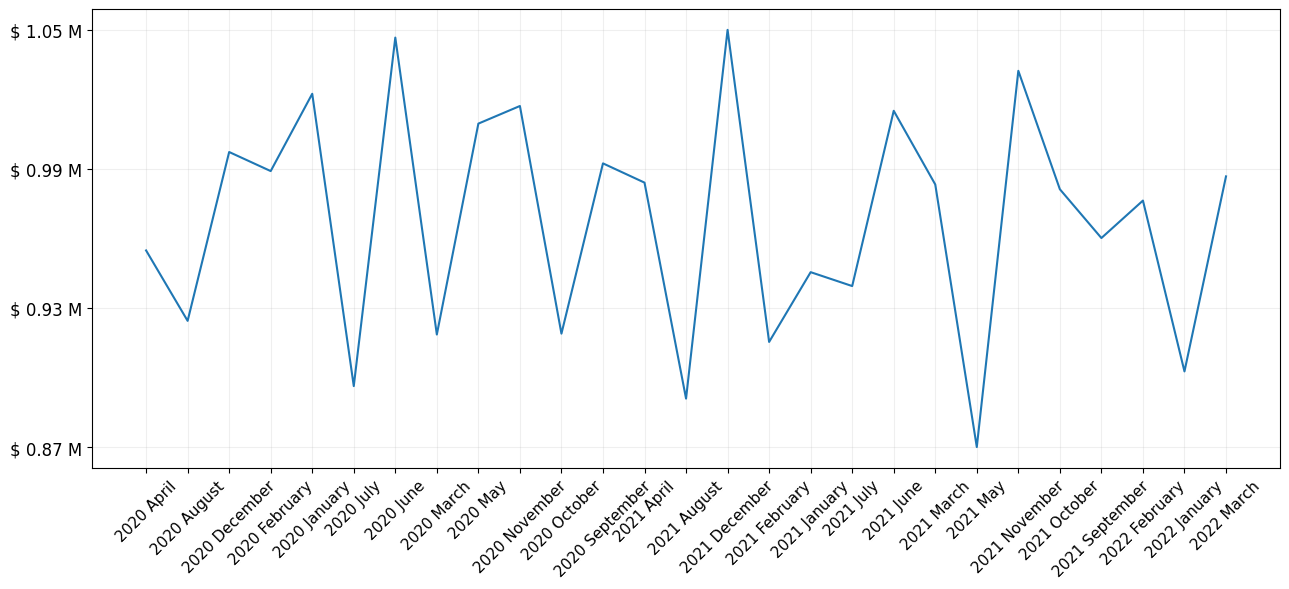

In [28]:
y_axis_split = 4
y_tickers = np.linspace(
    monthly_sales["Total Sales"].min(),
    monthly_sales["Total Sales"].max() + 1,
    y_axis_split,
)
y_tickers_labels = [f"$ {x/10**6:.2f} M" for x in y_tickers]


plt.figure(figsize=(13, 6))

plt.plot(monthly_sales.index, monthly_sales["Total Sales"])
plt.xticks(rotation=45, font={"size": 11})
plt.yticks(y_tickers, labels=y_tickers_labels, font={"size": 12})
plt.grid(True, alpha=0.2)
# plt.title("Sales Trend", pad=10, fontweight="bold")
plt.tight_layout()

plt.show()

### Daily sales

In [29]:
daily_sales = sales_with_dates.pivot_table(index='Order Date', values='Total Sales', aggfunc='sum')
daily_sales

,Total Sales
Order Date,
2020-01-01,25345.0
2020-01-02,32567.0
2020-01-03,36055.0
2020-01-04,19518.0
2020-01-05,29947.0
...,...
2022-03-27,26253.0
2022-03-28,26950.0
2022-03-29,14528.0


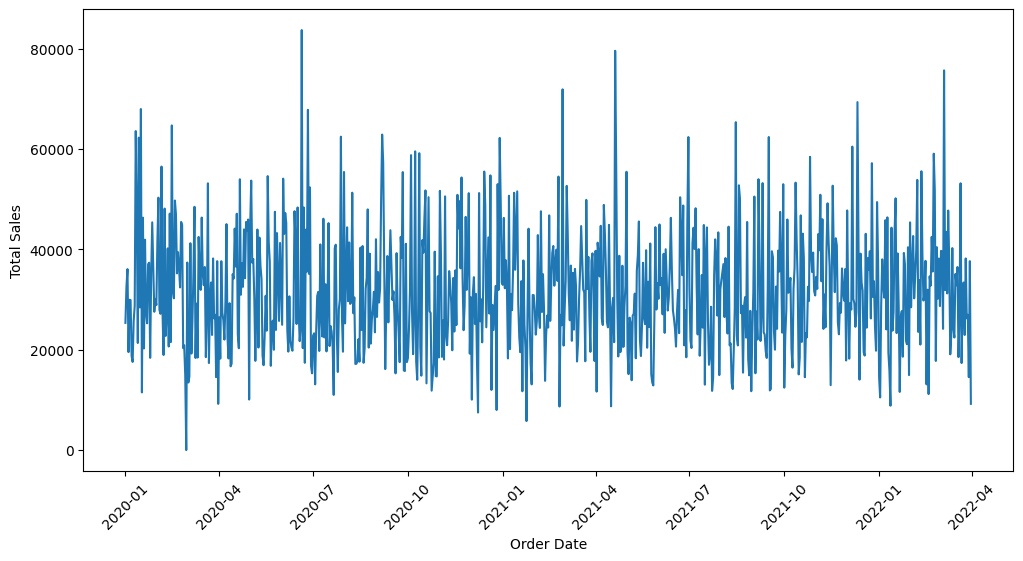

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales['Total Sales'])
plt.xticks(rotation=45)
plt.show()

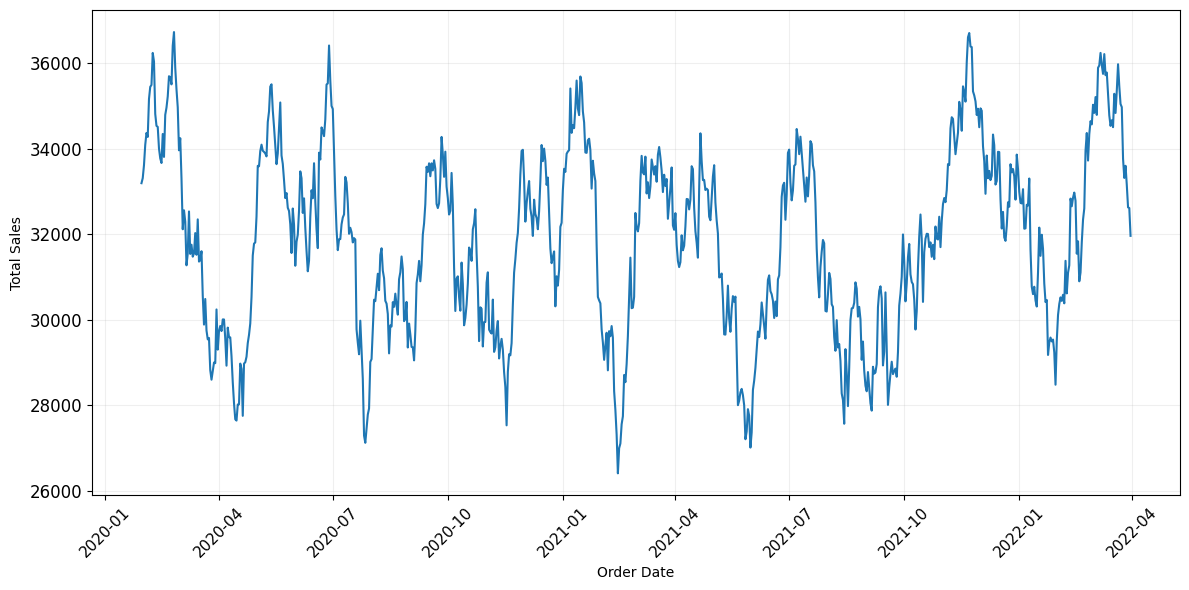

In [31]:
# Rolling window of 10
window = 30

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales['Total Sales'].rolling(window=window).mean())
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.2)
# plt.title(f"Daliy Sales Trend (Rolling window:{window})", pad=10, fontweight="bold")
plt.tight_layout()

plt.show()

## Total Sales

In [32]:
total_sales_kpi = f"${concat_sales_table['Total Sales'].sum():,}"
f"Total Sales: {total_sales_kpi}"

'Total Sales: $26,120,517'

## Monthly Average Sales

In [33]:
monthly_avg_sales_kpi = f"${monthly_sales['Total Sales'].mean().__round__(0):,.0f}"
f"Monthly Avg Sales: {monthly_avg_sales_kpi}"

'Monthly Avg Sales: $967,427'

## Total Cost

In [34]:
df2 = sales_and_products
df2.head()

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales,Product Name,Cost,Original Sale Price,Discount,Current Price,Taxes
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392,Product 30,1294,1848,0,1848,277.20
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725,Product 80,1363,1725,0,1725,258.75
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913,Product 62,584,913,0,913,136.95
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141,Product 84,1777,2141,0,2141,321.15
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799,Product 101,455,799,0,799,119.85


Total Cost

In [35]:
df2["Total Cost"] = df2["Cost"] * df2["Quantity"]

In [36]:
total_cost_kpi = f"${df2['Total Cost'].sum():,}"
f"Total Cost: {total_cost_kpi}"

'Total Cost: $17,629,130'

## Total Profit

In [37]:
df2["Total Profit"] = df2["Total Sales"] - df2["Total Cost"]
df2.head()

,Order ID,Product ID,Location ID,Sales Person ID,Customer ID,Order Date,Quantity,Price,Total Sales,Product Name,Cost,Original Sale Price,Discount,Current Price,Taxes,Total Cost,Total Profit
0,OID10004,PID2029,A142,EMP1019,C1078,2022-02-23,4,1848,7392,Product 30,1294,1848,0,1848,277.20,5176,2216
1,OID10014,PID2079,A152,EMP1041,C1073,2022-02-24,1,1725,1725,Product 80,1363,1725,0,1725,258.75,1363,362
2,OID11071,PID2061,A172,EMP1017,C1714,2022-03-01,1,913,913,Product 62,584,913,0,913,136.95,584,329
3,OID10032,PID2083,A156,EMP1025,C1342,2022-01-17,1,2141,2141,Product 84,1777,2141,0,2141,321.15,1777,364
4,OID10042,PID2100,A147,EMP1019,C1267,2022-01-03,1,799,799,Product 101,455,799,0,799,119.85,455,344


In [38]:
total_profit_kpi = f"${df2['Total Profit'].sum():,}"
f"Total Profit: {total_profit_kpi}"

'Total Profit: $8,491,387'

## Profit Margin

## Yearly Sales Distribution - Pie Chart

In [39]:
yearly_sales

,Total Sales
Year,
2020,11690763.0
2021,11565545.0
2022,2864209.0


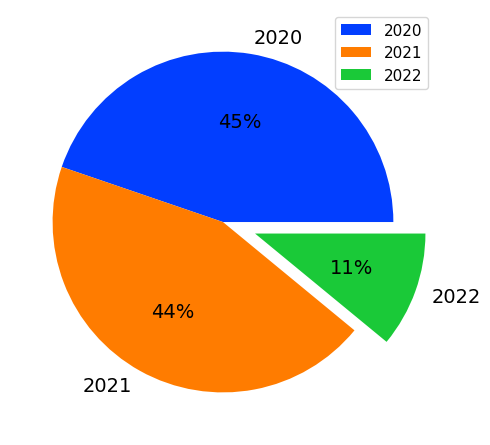

In [40]:
palette_color = sns.color_palette('bright') 
explode = [2/10 if j == min(yearly_sales["Total Sales"]) else 0 for i, j in zip(yearly_sales.index, yearly_sales['Total Sales'])]
  
# plotting data on pie chart
plt.figure(figsize=(5, 7.45))
plt.pie(yearly_sales["Total Sales"], labels=yearly_sales.index, colors=palette_color, autopct='%.0f%%', explode=explode, textprops={'fontsize': 14}) 
# plt.title("Yearly Sales Distribution", pad=10, fontweight="bold")
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

## Sales Heat Map

In [41]:
sales_with_dates

,Order Date,Year,Qtr,Month Name,Year Qtr,Year Monthname,Total Sales
0,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,880.0
1,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,1568.0
2,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,530.0
3,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,3774.0
4,2020-01-01,2020,1,January,2020 Qtr 1,2020 January,1022.0
...,...,...,...,...,...,...,...
11082,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,530.0
11083,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,1119.0
11084,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,880.0
11085,2022-03-31,2022,1,March,2022 Qtr 1,2022 March,203.0


In [42]:
sales_with_dates['Month Name'] = pd.Categorical(sales_with_dates['Month Name'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'], 
    ordered=True)

In [43]:
heat_df = sales_with_dates.pivot_table(index="Month Name", columns="Year", values="Total Sales", aggfunc='sum', observed=True)
heat_df

Year,2020,2021,2022
Month Name,,,
January,1024700.0,944532.0,899923.0
February,989964.0,913174.0,976706.0
March,916515.0,983950.0,987580.0
April,954294.0,984774.0,NaN
May,1011295.0,865939.0,NaN
June,1049952.0,1017053.0,NaN
July,893324.0,938285.0,NaN
August,922649.0,887709.0,NaN
September,993425.0,959872.0,NaN


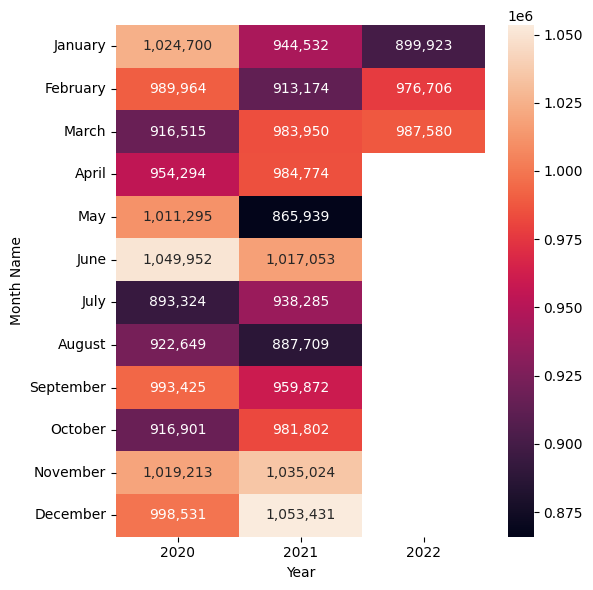

In [44]:
plt.figure(figsize=(6, 6))

sns.heatmap(heat_df, annot=True, fmt=',.0f')
# plt.title("Sales Heat Map", pad=10, fontweight="bold")
plt.tight_layout()
plt.show()